In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from glob import glob
import os

In [4]:
import matplotlib.pyplot as plt

In [5]:
filenames = sorted(glob("/Users/teliov/TUD/Thesis/Medvice/Notebooks/data/07_27_reports/injected_symptoms/inj*.csv"))

In [6]:
filenames

['/Users/teliov/TUD/Thesis/Medvice/Notebooks/data/07_27_reports/injected_symptoms/inj0.csv',
 '/Users/teliov/TUD/Thesis/Medvice/Notebooks/data/07_27_reports/injected_symptoms/inj1.csv',
 '/Users/teliov/TUD/Thesis/Medvice/Notebooks/data/07_27_reports/injected_symptoms/inj2.csv',
 '/Users/teliov/TUD/Thesis/Medvice/Notebooks/data/07_27_reports/injected_symptoms/inj3.csv']

In [30]:
nb_values = []
rf_values = []

for file in filenames:
    df = pd.read_csv(file)
    nb_df = df[df['model'] == 'naive_bayes'].groupby('train_size').mean()
    rf_df = df[df['model'] == 'random_forest'].groupby('train_size').mean()
    nb_values.append(nb_df)
    rf_values.append(rf_df)

nb = pd.concat(nb_values)
rf = pd.concat(rf_values)

In [31]:
fig_dir = "/Users/teliov/TUD/Thesis/Medvice/Notebooks/data/07_27_reports/injected_symptoms/figures"

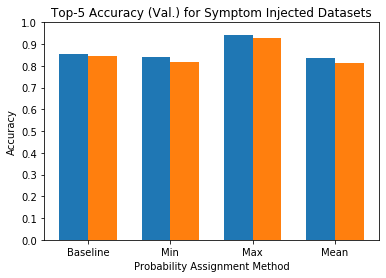

In [32]:
labels = ['Baseline', 'Min', 'Max', 'Mean']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, nb.top_5_test_score, width, label='Naive Bayes')
rects2 = ax.bar(x + width/2, rf.top_5_test_score, width, label='Random Forest')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xlabel('Probability Assignment Method')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_title('Top-5 Accuracy (Val.) for Symptom Injected Datasets')
fig.savefig(os.path.join(fig_dir, "injected_top5.png"))

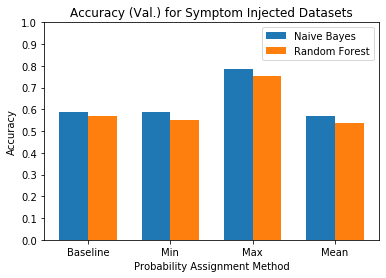

In [33]:
labels = ['Baseline', 'Min', 'Max', 'Mean']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, nb.accuracy_test_score, width, label='Naive Bayes')
rects2 = ax.bar(x + width/2, rf.accuracy_test_score, width, label='Random Forest')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xlabel('Probability Assignment Method')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_title('Accuracy (Val.) for Symptom Injected Datasets')
fig.savefig(os.path.join(fig_dir, "injected_accuracy.png"))

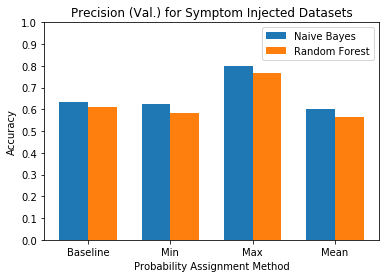

In [34]:
labels = ['Baseline', 'Min', 'Max', 'Mean']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, nb.precision_weighted_test_score, width, label='Naive Bayes')
rects2 = ax.bar(x + width/2, rf.precision_weighted_test_score, width, label='Random Forest')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_xlabel('Probability Assignment Method')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_yticks(np.arange(0, 1.1, 0.1))
ax.set_title('Precision (Val.) for Symptom Injected Datasets')
fig.savefig(os.path.join(fig_dir, "injected_precision.png"))

In [35]:
nb[['top_5_test_score', 'accuracy_test_score', 'precision_weighted_test_score']]

,top_5_test_score,accuracy_test_score,precision_weighted_test_score
train_size,,,
1.0,0.852993,0.587617,0.632678
1.0,0.841154,0.587663,0.622753
1.0,0.942416,0.784303,0.800705
1.0,0.833894,0.569931,0.603831


# 